# Wilkommen zur Datenanalyse "Dota 2 Matches"
#### Maren Sudahl, Robin Holzwarth, Vitalij Degraf, Yvonne Maul, Adrian Grünther
## Mögliche Fragestellungen
Kann man auf den Daten die vor Spielbeginn verfügbar sind den Ausgang des Spiels vorhersagen? (Aufd Basis der Erfolgschance der Champions)

Ab welchem Zeitpunkt, bzw. unter welchen Bedingungen in einem Spiel ist der Ausgang sicher? (Teamgold und Tode bzw. Tower)

Wie wirkt sich das Verhalten der Spieler in dem Chat auf das Spielergebnis aus bzw. der Spielverlauf auf das Chatverhalten aus?

Gibt es Helden die erfolgreichen sind als andere? Welchen Einfluss hat die Zeit auf die Erfolgschancen?

## Analyse und Testdaten
Wir möchten mit Analyse und Testdaten arbeiten. 
Analysedaten: 5000 Spiele
Testdaten: 45000 Spiele


## Import der nötigen Bibliotheken

In [6]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

## Laden der Daten zu Analysezwecken 
Namenskonvention: df_(name_file) 

df_(name_file) = pd.read_csv('data/dota-2-matches/(name_file).csv',nrows = anzahl_daten, memory_map=True)

In [14]:
df_players = pd.read_csv('data/dota-2-matches/players.csv', memory_map=True)
# df_match_outcomes = pd.read_csv('data/dota-2-matches/match_outcomes.csv' ,memory_map=True)
# df_chat = pd.read_csv('data/dota-2-matches/chat.csv', memory_map=True)

In [46]:
df_players.groupby("hero_id").count()

,match_id,account_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
hero_id,,,,,,,,,,,,,,,,,,,,,
0,37,37,37,37,37,37,37,37,37,37,...,0,0,0,0,0,0,0,0,0,0
1,9396,9396,9396,9396,9396,9396,9396,9396,9396,9396,...,4056,231,0,4592,69,0,0,0,0,0
2,4601,4601,4601,4601,4601,4601,4601,4601,4601,4601,...,2202,207,0,2673,12,0,0,0,0,0
3,2553,2553,2553,2553,2553,2553,2553,2553,2553,2553,...,1089,316,0,2091,23,0,0,0,0,0
4,2956,2956,2956,2956,2956,2956,2956,2956,2956,2956,...,1468,82,0,1793,9,0,0,0,0,0
5,7846,7846,7846,7846,7846,7846,7846,7846,7846,7846,...,3134,905,0,5433,45,0,0,0,0,0
6,2608,2608,2608,2608,2608,2608,2608,2608,2608,2608,...,1113,71,0,1058,12,0,0,0,0,0
7,11323,11323,11323,11323,11323,11323,11323,11323,11323,11323,...,5301,1110,0,9494,45,0,0,0,0,0
8,10394,10394,10394,10394,10394,10394,10394,10394,10394,10394,...,4567,306,0,7698,70,0,0,0,0,0


In [24]:
df_chat.columns

Index(['match_id', 'key', 'slot', 'time', 'unit'], dtype='object')

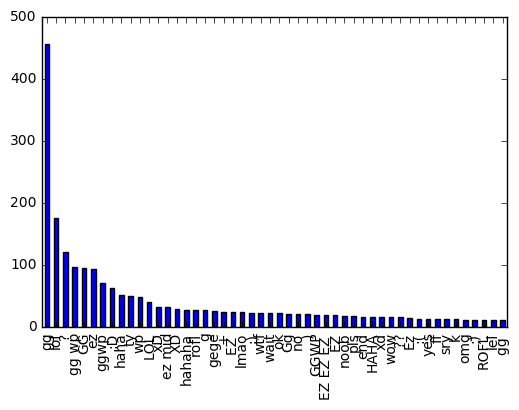

In [13]:
df_chat["key"].value_counts().head(50).plot.bar()